In [1]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1)	Abrir as imagens coloridas e mostrar a imagem e seus histogramas (separados) cada canal de cor. Considerar os seguintes sistemas de cores:
a.	RGB
b.	HSV ou HSI
c.	Lab


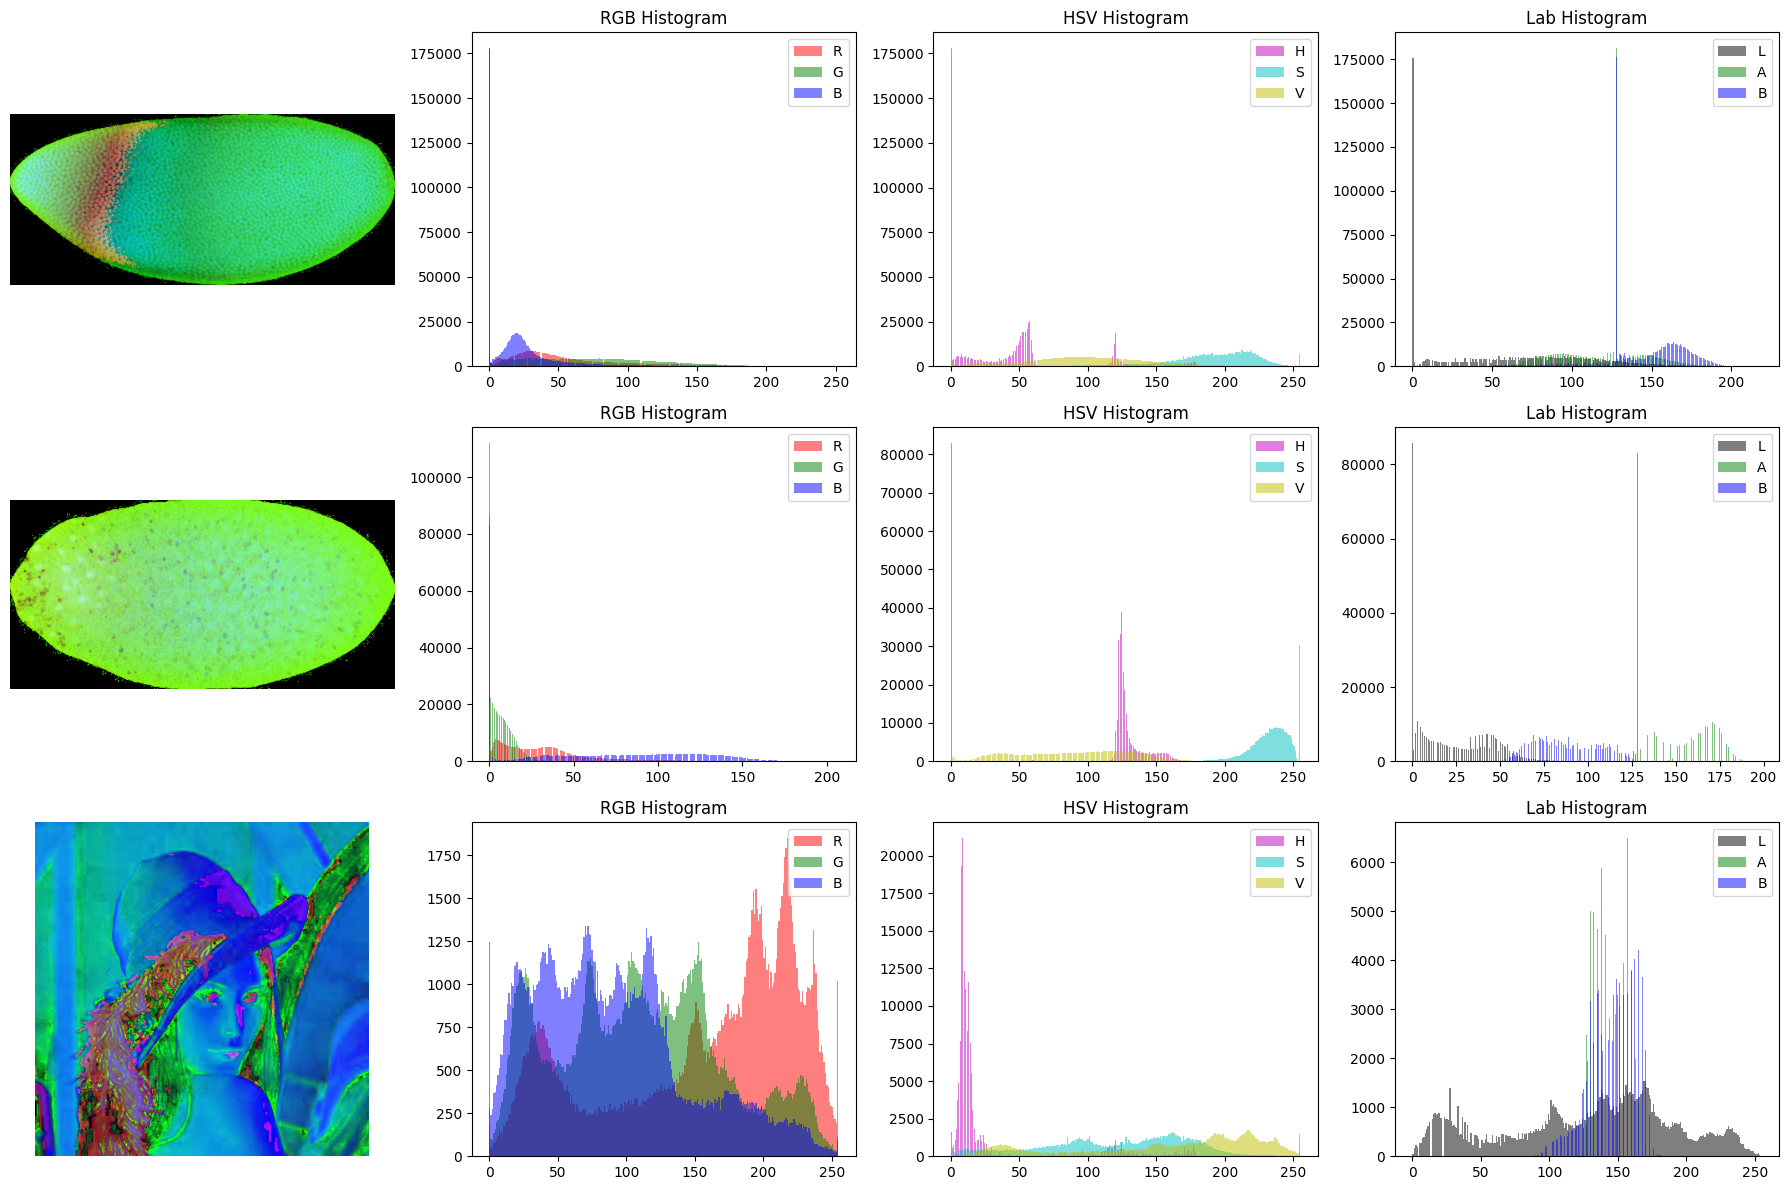

In [4]:
img1 = cv2.imread("image.jpg", cv2.IMREAD_COLOR)
img1RGB = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1HSV = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
img1Lab = cv2.cvtColor(img1, cv2.COLOR_BGR2Lab)

img2 = cv2.imread("image2.jpg", cv2.IMREAD_COLOR)
img2RGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2HSV = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
img2Lab = cv2.cvtColor(img2, cv2.COLOR_BGR2Lab)

img3 = cv2.imread("Lenna.jpg", cv2.IMREAD_COLOR)
img3RGB = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img3HSV = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)
img3Lab = cv2.cvtColor(img3, cv2.COLOR_BGR2Lab)

images = [(img1RGB, img1HSV, img1Lab), (img2RGB, img2HSV, img2Lab), (img3RGB, img3HSV, img3Lab)]

plt.figure(figsize=(18, 12))

for i, (rgb, hsv, lab) in enumerate(images):
    plt.subplot(3, 4, 4 * i + 1)
    plt.imshow(hsv)
    plt.axis("off")

    plt.subplot(3, 4, 4 * i + 2)
    plt.hist(rgb[:, :, 0].ravel(), bins=256, color='r', alpha=0.5, label='R')
    plt.hist(rgb[:, :, 1].ravel(), bins=256, color='g', alpha=0.5, label='G')
    plt.hist(rgb[:, :, 2].ravel(), bins=256, color='b', alpha=0.5, label='B')
    plt.title("RGB Histogram")
    plt.legend(loc='upper right')

    plt.subplot(3, 4, 4 * i + 3)
    plt.hist(hsv[:, :, 0].ravel(), bins=256, color='m', alpha=0.5, label='H')
    plt.hist(hsv[:, :, 1].ravel(), bins=256, color='c', alpha=0.5, label='S')
    plt.hist(hsv[:, :, 2].ravel(), bins=256, color='y', alpha=0.5, label='V')
    plt.title("HSV Histogram")
    plt.legend(loc='upper right')

    plt.subplot(3, 4, 4 * i + 4)
    plt.hist(lab[:, :, 0].ravel(), bins=256, color='k', alpha=0.5, label='L')
    plt.hist(lab[:, :, 1].ravel(), bins=256, color='g', alpha=0.5, label='A')
    plt.hist(lab[:, :, 2].ravel(), bins=256, color='b', alpha=0.5, label='B')
    plt.title("Lab Histogram")
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


2)	Utilizando a imagem do mandrill, faça rotinas para detecção do focinho (região vermelha e azul). Utilize algum algoritmo de limiarização.

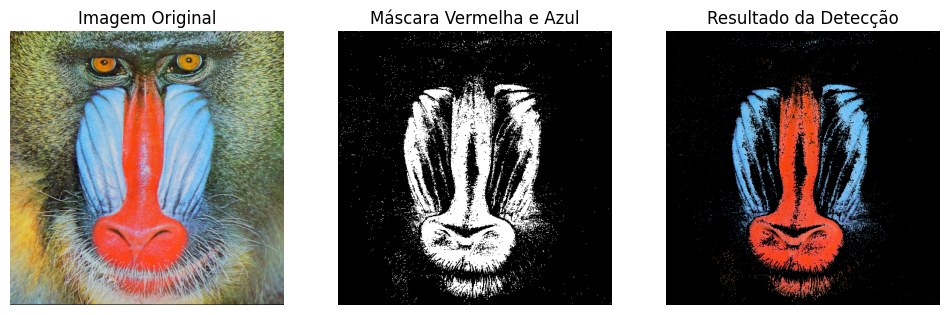

In [11]:
img_mand = cv2.imread("mandrill.tiff", cv2.IMREAD_COLOR)

img_mand_RGB = cv2.cvtColor(img_mand, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(img_mand, cv2.COLOR_BGR2HSV)

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])



lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])

mask_red = cv2.inRange(img_hsv, lower_red1, upper_red1)
# mask_red2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
# mask_red = cv2.bitwise_or(mask_red1, mask_red2)

mask_blue = cv2.inRange(img_hsv, lower_blue, upper_blue)

mask_combined = cv2.bitwise_or(mask_red, mask_blue)

result = cv2.bitwise_and(img_mand_RGB, img_mand_RGB, mask=mask_combined)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Imagem Original')
plt.imshow(img_mand_RGB)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Máscara Vermelha e Azul')
plt.imshow(mask_combined, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Resultado da Detecção')
plt.imshow(result)
plt.axis('off')

plt.show()


3)	Utilizando a imagem HE.jpg, tente detectar e contar a quantidade de núcleos celulares (em azul). Aplicar o Ostu para os 9 canais de cores e avaliar qual foi melhor (R,G,B,H,S,V,L,a,b)

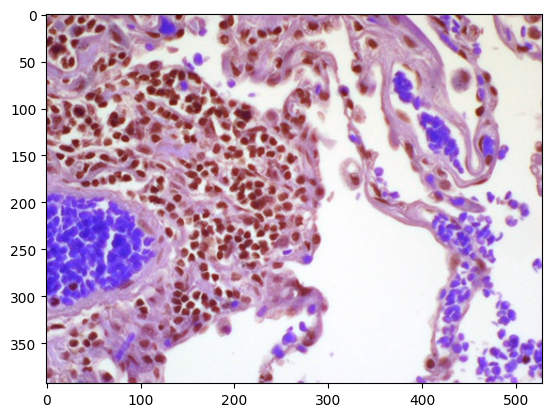

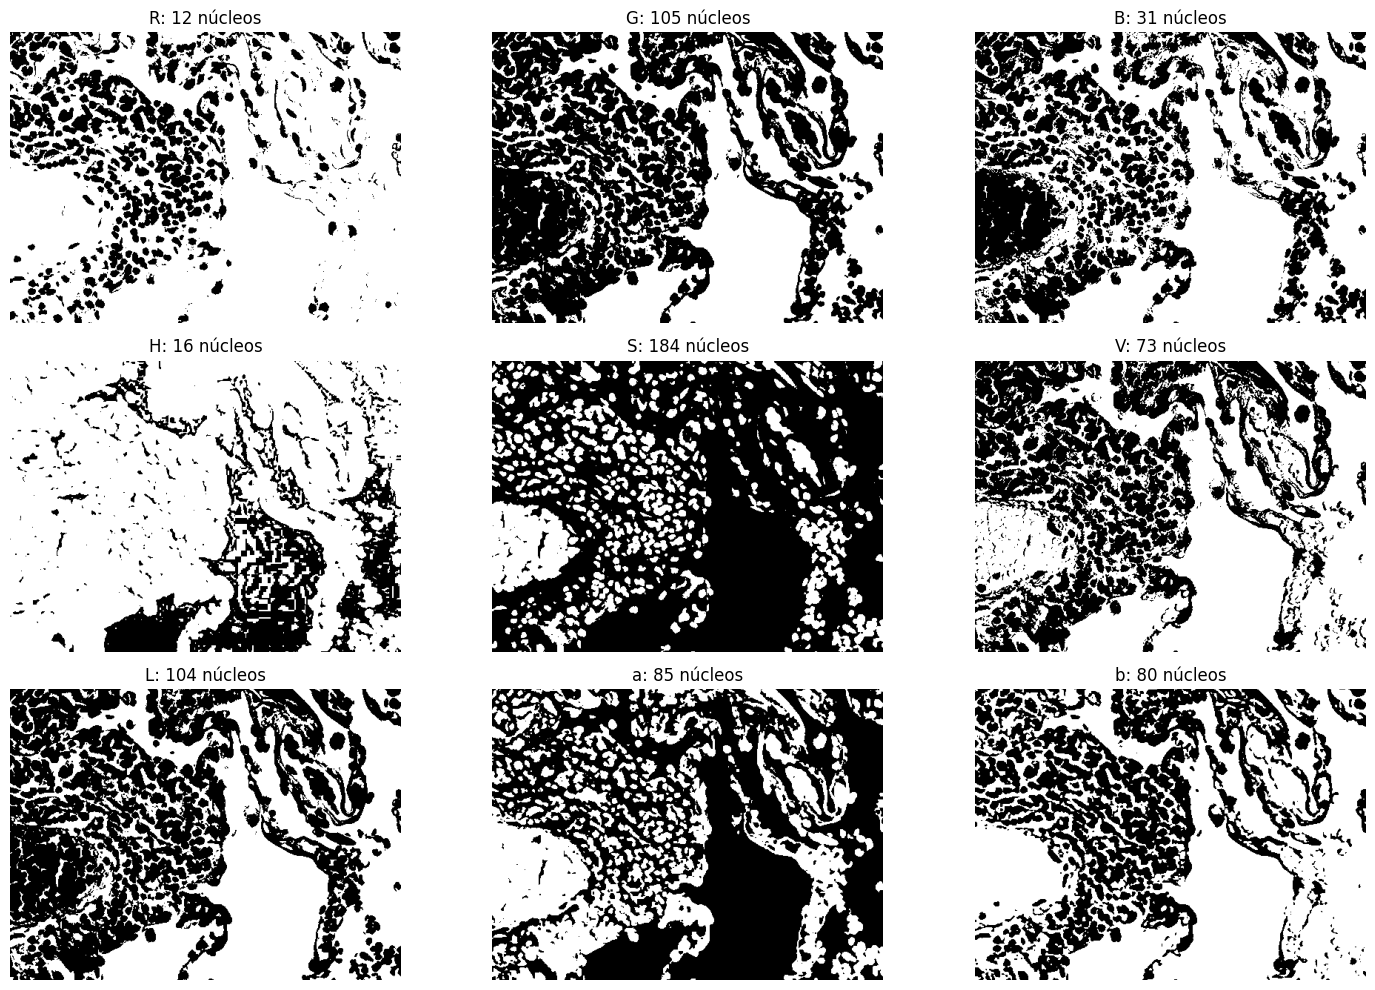

Núcleos detectados no canal R: 12
Núcleos detectados no canal G: 105
Núcleos detectados no canal B: 31
Núcleos detectados no canal H: 16
Núcleos detectados no canal S: 184
Núcleos detectados no canal V: 73
Núcleos detectados no canal L: 104
Núcleos detectados no canal a: 85
Núcleos detectados no canal b: 80


In [12]:
img_he = cv2.imread("HE.jpg", cv2.IMREAD_COLOR)
plt.imshow(img_he, cmap='gray')
img_he_RGB = cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB)
img_he_HSV = cv2.cvtColor(img_he, cv2.COLOR_BGR2HSV)
img_he_LAB = cv2.cvtColor(img_he, cv2.COLOR_BGR2Lab)

results = []

canais = {
    'R': img_he_RGB[:, :, 0],
    'G': img_he_RGB[:, :, 1],
    'B': img_he_RGB[:, :, 2],
    'H': img_he_HSV[:, :, 0],
    'S': img_he_HSV[:, :, 1],
    'V': img_he_HSV[:, :, 2],
    'L': img_he_LAB[:, :, 0],
    'a': img_he_LAB[:, :, 1],
    'b': img_he_LAB[:, :, 2],
}

for nome_canal, canal in canais.items():
    _, img_bin = cv2.threshold(canal, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    kernel = np.ones((5, 5), np.uint8)
    morph = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel)
    morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)
    
    contornos, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    nucleo_cont = len(contornos)
    
    results.append((nome_canal, nucleo_cont, img_bin))

plt.figure(figsize=(15, 10))
for i, (nome_canal, cont, img_bin) in enumerate(results):
    plt.subplot(3, 3, i + 1)
    plt.title(f"{nome_canal}: {cont} núcleos")
    plt.imshow(img_bin, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

for nome_canal, cont, _ in results:
    print(f"Núcleos detectados no canal {nome_canal}: {cont}")
